<h2 align='center'>🧠 Intro to Deep Learning 2 - Binary Classification Problems</h2>
<br />
<i><center>Why just make predictions if we can also classify?</center></i>

----

`Classification` is another Supervisioned Learning method that we can apply on ours networks. In the previous two notebooks we have seen how to predictions with `Regressions`, but now, let's give an especial attention to the `Classifications`.

Besides, as far as you already the basic network structure, such as Activation Functions, Optimizers and Loss Functions, I will be straight to the point in this notebook and just go deeper in the new concepts that you will see here.

So, let's hands-on!!

> Topics:

```
- Accuracy and Cross-Entropy
- Sigmoid Activation Function
- Binary Classification in Python Code
```

----

<h2>0) Accuracy and Cross-Entropy</h2>

If you had studied or worked with Classification Problems with Machine Learning, you've probably stumbled upon with `Accuracy`. This a measure metric, like `Mean Absolute Error (*MAE*)`, `Mean Squared Error (*MSE*)` and `Huber Loss Function`, however, destined to Classification Problems rather than Regression ones.

`Accuracy` works measuring the ratio of correct predictions (*True Positives and True Negatives*) to total predictions (*True Positives, True Negatives, False Positives and False Negatives*), being the equation:

```python
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
```

<br />

$Accuracy = \frac{true\ negatives + true\ positives}{true\ positives + false\ positives + true\ negatives + false\ negatives}$

<br />

> **True Positive (TP)** - the model predicted true, and the real outcome is true; ✔️

> **True Negative (TN)** - the model predicted false, and the real outcome is false; ✔️

> **False Positive (FP)** - the model predicted true, and the real outcome is false; ❌

> **False Negative (FN)** - the model predicted false, and the real outcome is true. ❌

<br />

----

However, this metric and the most classification metrics used on Machine Learning cannot be used as a Loss Function in Deep Learning, because our `Stocastig Gradient Descendent (*SGD*)`, AKA `Optimizer`, needs a Loss Function that changes smoothly, but Accuracy, being a ratio of counts, changes in *jumps*. So, we have to choose a substitute to be the Loss Function, and guess what? This is when `Cross-Entropy Function` comes in action.

Taking a look at the image below, you can realize that the line is smoothly, that is, there are no elbow curves in its trajectory!!

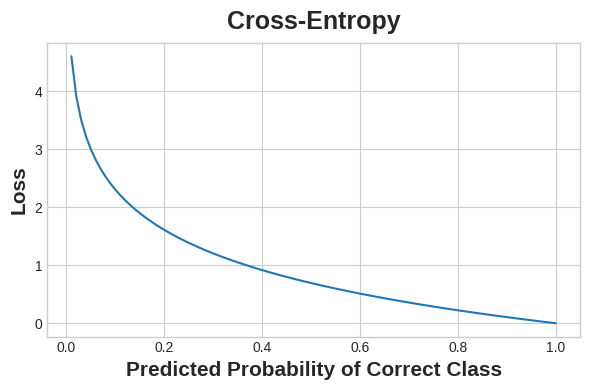

The idea here is that we want our network to predict the correct class with probability closer to **1.0**, that's, the probability closer to 100% certainty of getting the correct predicted class. The further away the predicted probability is from 1.0, the greater will be the Cross-Entropy Loss.

----

<h2>1) Sigmoid Function</h2>

The Loss Function is not just the one to be changed to Classification Problems, we have to change the Activation Function for our output layer too. A great choice to replace the `Linear Function` used for Regression is the `Sigmoid` one.

`Sigmoid Function` works likely to `Logistic Regression`, that is, gets the output of the previous layer and convert it to a range between `0.0` and `1.0` and, accordingly to the output value, the network classifies the input in one of the two possible classes.

<br />

> **Output Value Greater than or Equals Threshold** - classifies the input as the class A;

> **Output Value Smaller than Threshold** - classifies the input as the class B.

<br />

Usually, **0.5** is the default value for the `Threshold` use by Keras, but you can change this value by code.

The image below explains the previous explanation.

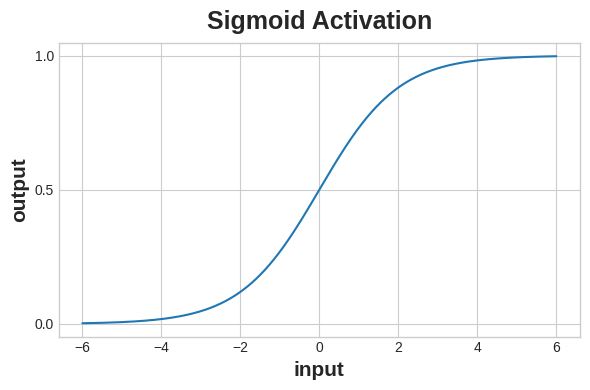

----

<h2>2)Binary Classification in Python Code</h2>

Let's see how to apply the new knowledge in Python Code!!

In [58]:
import pandas as pd # pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib

# ---- Reading Dataset ----
df = pd.read_csv('../datasets/ion.csv', index_col=0)
display(df.head())

# ---- Encoding Classes ----
#
# \ good  >>  0
# \ bad   >>  1
#
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

# ---- Splitting Dataset into Train and Validation ----
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

# ---- Scaling the Train and Validation Splits ----
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# ---- Droping Rows with Missing Values ----
df_train.dropna(axis=1, inplace=True)
df_valid.dropna(axis=1, inplace=True)

# ---- Splitting Datasets into Features (X) and Targets (y)
X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [59]:
# pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers

# ---- Creating the Model ----
model = keras.Sequential([
    # hidden layers
    layers.Dense(units=4, activation='relu', input_shape=[33])
    , layers.Dense(units=4, activation='relu')
    
    # output layer
    , layers.Dense(units=1, activation='sigmoid') # Sigmoid Activation Function goes here
])

# ---- Assigning Optimizer and Loss Function ----
model.compile(
    optimizer='adam'
    , loss='binary_crossentropy'
    , metrics=['binary_accuracy']
)
               
# ---- Summarizing Model ----
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 4)                 136       
                                                                 
 dense_46 (Dense)            (None, 4)                 20        
                                                                 
 dense_47 (Dense)            (None, 1)                 5         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


Best Validation Loss: 0.3043
Best Validation Accuracy: 0.9048


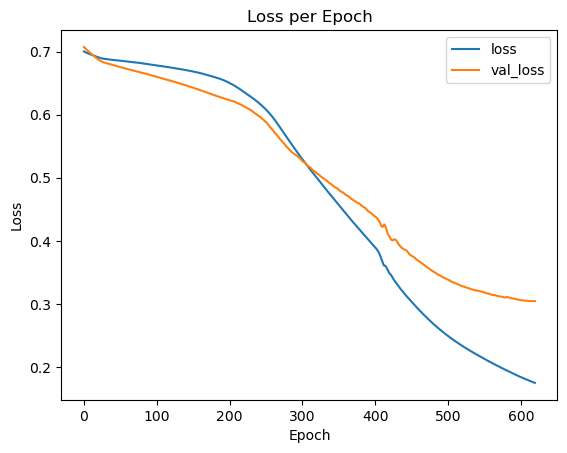

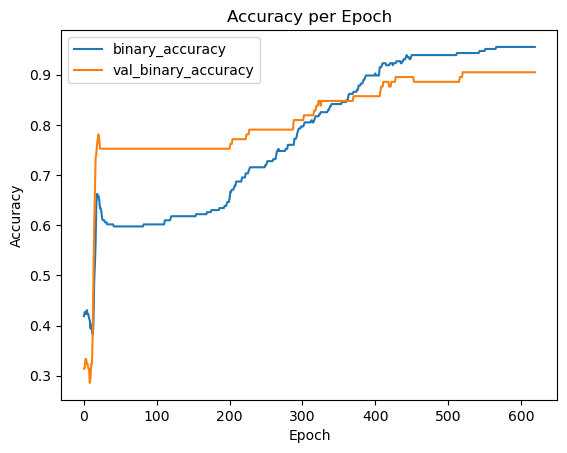

In [60]:
# ---- Early Stopping Strategy ----
early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.001              # minimum learning rate
    , patience=10                # tolerated number of epochs
    , restore_best_weights=True  # literally restore the best weights over the training step
)

# ---- Training the Model ----
history = model.fit(
    X_train, y_train
    , validation_data=[X_valid, y_valid]
    , batch_size=512
    , epochs=1000
    , callbacks=[early_stopping]
    , verbose=0
)

# ---- Plotting the Results ----
history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot()
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# ---- Best Loss and Accuracy on Validation Step ----
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

----

> **OBS.** - this example works out just with `Binary Classifications`, if you're working with `Multiple Classifications`, consider searching for the appropriate `Optimizers`, `Loss Functions` and `Metrics`.